<a href="https://colab.research.google.com/github/Indiranafa/2023/blob/main/Week3_PCVK_Indira_Nafa_Aurah_Huda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import matplotlib.pyplot as plt
import math

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


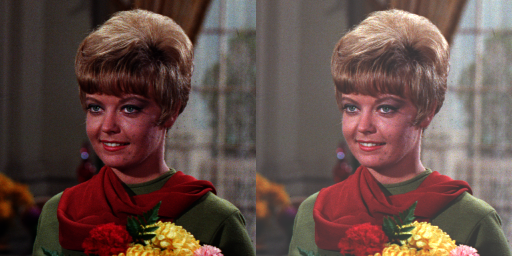

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      value = int(original[y,x,c]) + brightness
      brightness_image[y,x,c] = np.clip(value, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, alpha=1, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Implementasi Inverse Citra 
-----------------------------


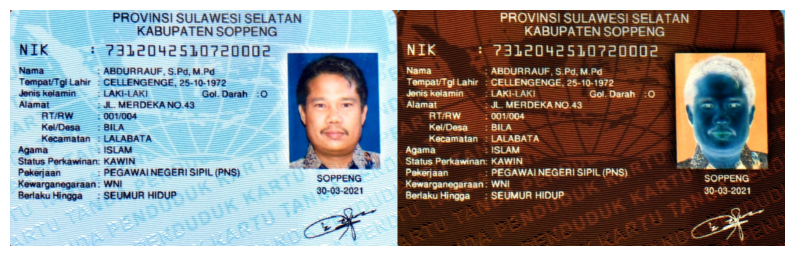

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Implementasi Inverse Citra ')
print('-----------------------------')

# Baca gambar KTP
img = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Invers citra (Negative Image)
inverse = 255 - img

# Gabungkan untuk ditampilkan berdampingan
final = cv.hconcat([img, inverse])

figz = plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 sampai 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


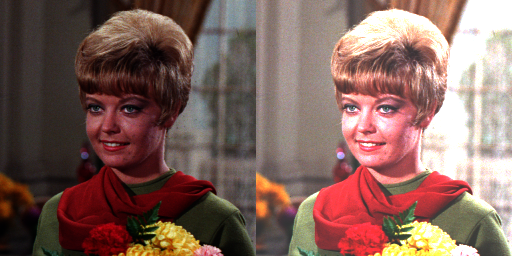

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 sampai 255]: '))
    contrast   = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, input tidak valid')

# Baca citra
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Buat array kosong untuk hasil
out = np.zeros(img.shape, dtype=np.uint8)

# Fungsi truncate (agar nilai tetap dalam 0–255)
def truncate(val):
    if val < 0:
        return 0
    elif val > 255:
        return 255
    else:
        return int(val)

# Proses setiap pixel manual sesuai rumus g(x,y) = a*f(x,y) + b
for y in range(img.shape[0]):       # tinggi citra
    for x in range(img.shape[1]):   # lebar citra
        for c in range(img.shape[2]):   # channel warna (B, G, R)
            new_val = contrast * int(img[y, x, c]) + brightness
            out[y, x, c] = truncate(new_val)

# Gabungkan input & output untuk perbandingan
final = cv.hconcat([img, out])

# Tampilkan hasil
cv2_imshow(final)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan (konstanta c): 50


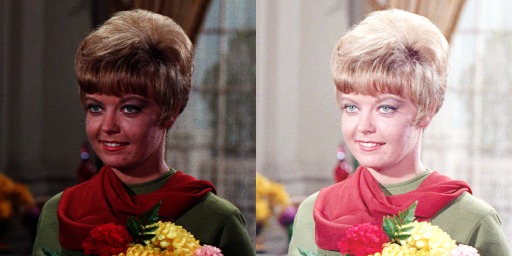

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
    c = int(input('Masukkan nilai kecerahan (konstanta c): '))
except ValueError:
    print('Error, input tidak valid')

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_float = img.astype(np.float32)

# Terapkan transformasi log
log_img = c * np.log(1 + img_float)
log_img = np.clip(log_img, 0, 255).astype(np.uint8)

# Gabungkan citra asli dan hasil
final = cv.hconcat([img, log_img])

cv2_imshow(final)

Hasil Grayscale Averaging


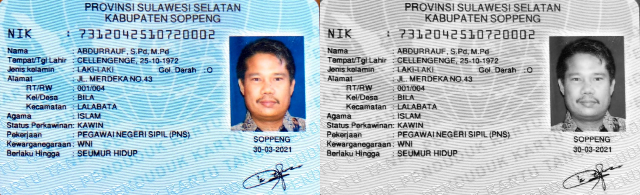

Hasil Grayscale Lightness


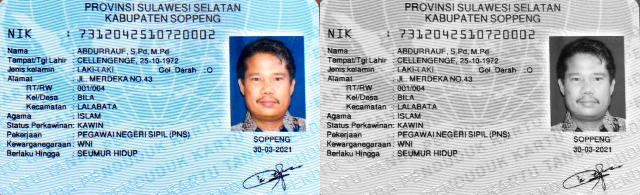

Hasil Grayscale Luminance


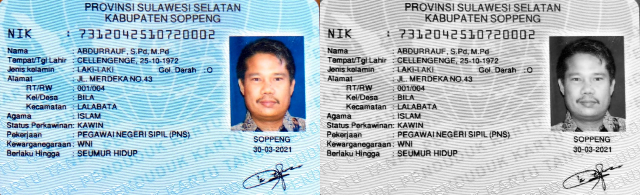

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra
original = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Buat array kosong untuk hasil grayscale
gray_avg = np.zeros(original.shape[:2], dtype=np.uint8)
gray_light = np.zeros(original.shape[:2], dtype=np.uint8)
gray_lum = np.zeros(original.shape[:2], dtype=np.uint8)

# Loop per piksel sesuai formula modul
for y in range(original.shape[0]):      # tinggi
    for x in range(original.shape[1]):  # lebar
        B, G, R = original[y, x]

        # Konversi ke int agar tidak overflow
        R = int(R)
        G = int(G)
        B = int(B)

        # Averaging
        gray_avg[y, x] = (R + G + B) // 3

        # Lightness
        gray_light[y, x] = (max(R, G, B) + min(R, G, B)) // 2

        # Luminance
        gray_lum[y, x] = int(0.21*R + 0.72*G + 0.07*B)

# Ubah hasil grayscale ke BGR agar bisa digabung
gray_avg_bgr = cv.cvtColor(gray_avg, cv.COLOR_GRAY2BGR)
gray_light_bgr = cv.cvtColor(gray_light, cv.COLOR_GRAY2BGR)
gray_lum_bgr = cv.cvtColor(gray_lum, cv.COLOR_GRAY2BGR)

# Gabungkan hasil dengan citra asli
final_avg = cv.hconcat([original, gray_avg_bgr])
final_light = cv.hconcat([original, gray_light_bgr])
final_lum = cv.hconcat([original, gray_lum_bgr])

# --- Resize biar tidak terlalu besar ---
scale_percent = 40
def resize_img(img, scale_percent):
    w = int(img.shape[1] * scale_percent / 100)
    h = int(img.shape[0] * scale_percent / 100)
    return cv.resize(img, (w, h))

final_avg_resized = resize_img(final_avg, scale_percent)
final_light_resized = resize_img(final_light, scale_percent)
final_lum_resized = resize_img(final_lum, scale_percent)

# Tampilkan hasil
print("Hasil Grayscale Averaging")
cv2_imshow(final_avg_resized)

print("Hasil Grayscale Lightness")
cv2_imshow(final_light_resized)

print("Hasil Grayscale Luminance")
cv2_imshow(final_lum_resized)

 Menampilkan warna tertentu dan sisanya grayscale 
--------------------------------------------------


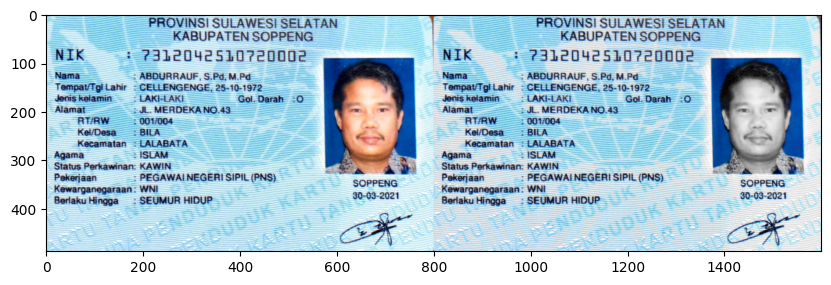

In [14]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Menampilkan warna tertentu dan sisanya grayscale ')
print('--------------------------------------------------')

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

# Konversi ke HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Range warna biru (bisa disesuaikan kalau warna lain)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([140, 255, 255])

# Buat mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Konversi citra asli ke grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan: area biru tetap berwarna, sisanya grayscale
result = np.where(mask[:, :, np.newaxis] != 0, img, gray_bgr)

# Gabungkan agar mirip jobsheet (asli vs hasil)
final = cv.hconcat([img, result])

figz = plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB))
plt.show()

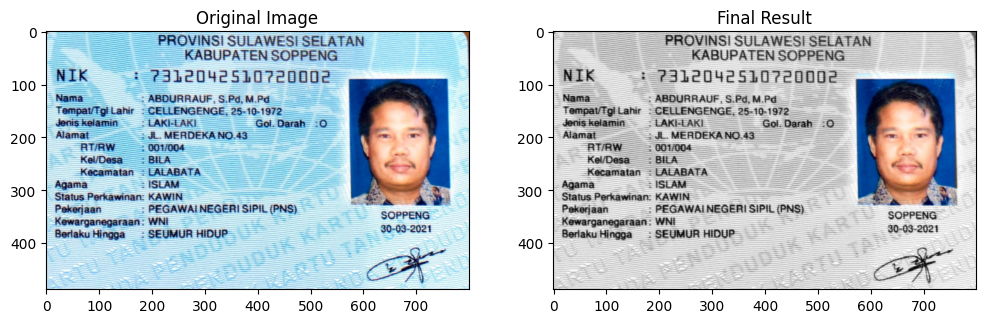

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/PCVK/KTP7.jpeg'

# Baca Gambar
image_bgr = cv2.imread(file_path)
if image_bgr is None:
    raise FileNotFoundError(f"Gambar '{file_path}' tidak ditemukan.")

# OpenCV baca BGR, ubah ke RGB biar warnanya benar di matplotlib
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Konversi ke Grayscale
grayscale_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
grayscale_image = cv2.cvtColor(grayscale_image, cv2.COLOR_GRAY2RGB)\

# Contoh koordinat yang lebih rapat ke pas foto
x0, y0, w, h = 575, 80, 185, 250

# Salin grayscale ke result
result_image = grayscale_image.copy()

# Ganti area pas foto dengan citra asli
result_image[y0:y0+h, x0:x0+w] = image_rgb[y0:y0+h, x0:x0+w]

# Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(result_image)
plt.title("Final Result")

plt.show()

 Transformasi Gamma Correction 
-------------------------------
Masukkan nilai gamma (misal 0.5, 1.0, 2.0, 3.0): 3


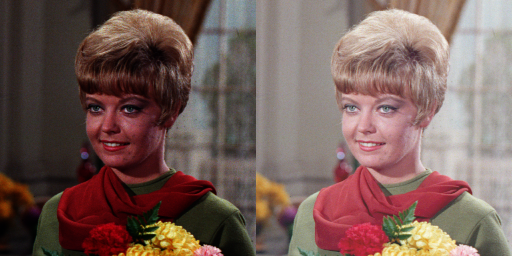

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Transformasi Gamma Correction ')
print('-------------------------------')

try:
    gamma = float(input("Masukkan nilai gamma (misal 0.5, 1.0, 2.0, 3.0): "))
except ValueError:
    print("Error, input tidak valid")

# Baca citra
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Siapkan array kosong untuk hasil
gamma_corrected = np.zeros_like(img, dtype=np.uint8)

# Iterasi tiap piksel sesuai rumus di modul
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):  # channel B, G, R
            r = img[y, x, c]
            s = 255 * ((r/255) ** (1.0/gamma))  # rumus modul
            gamma_corrected[y, x, c] = np.clip(s, 0, 255)

# Gabungkan citra asli dan hasil
final = cv.hconcat([img, gamma_corrected])

cv2_imshow(final)

 Simulasi Bit Depth pada Citra 
-------------------------------
Masukkan bit depth (1 - 7): 2


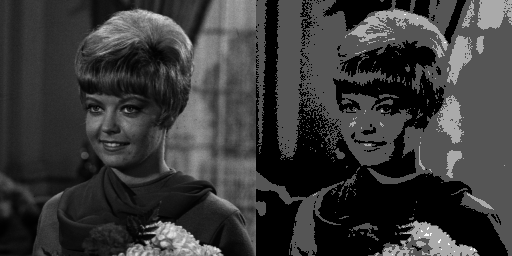

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Simulasi Bit Depth pada Citra ')
print('-------------------------------')

# Baca citra grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

try:
    bit_depth = int(input("Masukkan bit depth (1 - 7): "))
except ValueError:
    print("Error, input tidak valid")

# Hitung level sesuai rumus modul
level = 255.0 / (2**bit_depth - 1)

# Buat array kosong untuk hasil
sim = np.zeros_like(img, dtype=np.uint8)

# Iterasi tiap piksel sesuai rumus modul
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        r = img[y, x]  # nilai piksel asli
        s = round(r / level) * level
        sim[y, x] = np.clip(s, 0, 255)

# Gabungkan citra asli dan hasil simulasi
final = cv.hconcat([img, sim])

cv2_imshow(final)

 Average Denoising + Hitung PSNR 
---------------------------------
Jumlah file noise = 100
Contoh file = ['/content/drive/MyDrive/PCVK/Noises/noises/1.jpg', '/content/drive/MyDrive/PCVK/Noises/noises/10.jpg', '/content/drive/MyDrive/PCVK/Noises/noises/100.jpg', '/content/drive/MyDrive/PCVK/Noises/noises/11.jpg', '/content/drive/MyDrive/PCVK/Noises/noises/12.jpg']
N=10, PSNR=19.74 dB


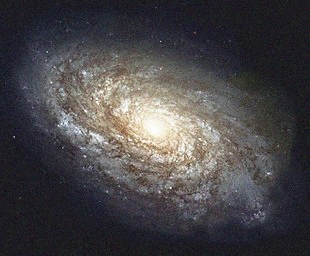

N=20, PSNR=19.84 dB


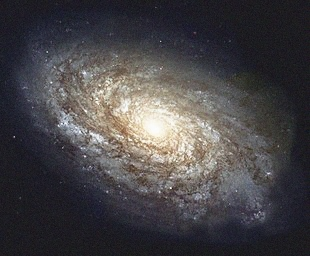

N=40, PSNR=19.89 dB


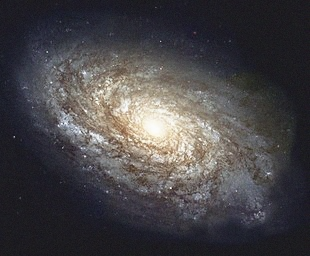

N=80, PSNR=19.92 dB


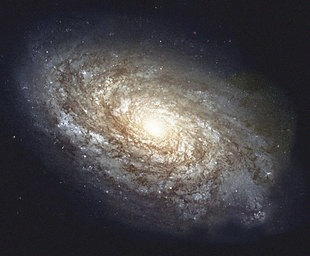

N=100, PSNR=19.92 dB


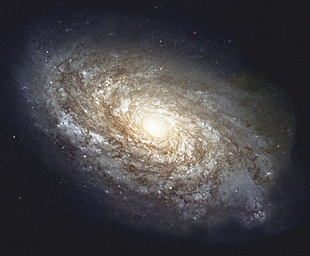

In [13]:
import cv2 as cv
import numpy as np
import glob
import math
from google.colab.patches import cv2_imshow

print(' Average Denoising + Hitung PSNR ')
print('---------------------------------')

# Baca citra referensi (ground truth)
ref = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Ambil kumpulan citra noise
noise_files = sorted(glob.glob('/content/drive/MyDrive/PCVK/Noises/noises/*.jpg'))

print("Jumlah file noise =", len(noise_files))
print("Contoh file =", noise_files[:5])

# Fungsi hitung MSE manual
def hitung_mse(img1, img2):
    h, w, c = img1.shape
    mse = 0.0
    for y in range(h):
        for x in range(w):
            for ch in range(c):
                diff = int(img1[y, x, ch]) - int(img2[y, x, ch])
                mse += diff * diff
    mse /= (h * w * c)
    return mse

# Fungsi hitung PSNR manual
def hitung_psnr(img1, img2):
    mse = hitung_mse(img1, img2)
    if mse == 0:
        return 100  # identik
    psnr = 20 * math.log10(255.0 / math.sqrt(mse))
    return psnr

# Coba untuk beberapa jumlah N
for N in [10, 20, 40, 80, 100]:
    acc = np.zeros_like(ref, dtype=np.float64)

    # Rata-rata N citra
    for i in range(N):
        im = cv.imread(noise_files[i]).astype(np.float64)
        acc += im

    avg = acc / N
    avg = np.clip(avg, 0, 255).astype(np.uint8)

    # Hitung PSNR terhadap citra referensi
    psnr = hitung_psnr(ref, avg)

    print(f"N={N}, PSNR={psnr:.2f} dB")
    cv2_imshow(avg)

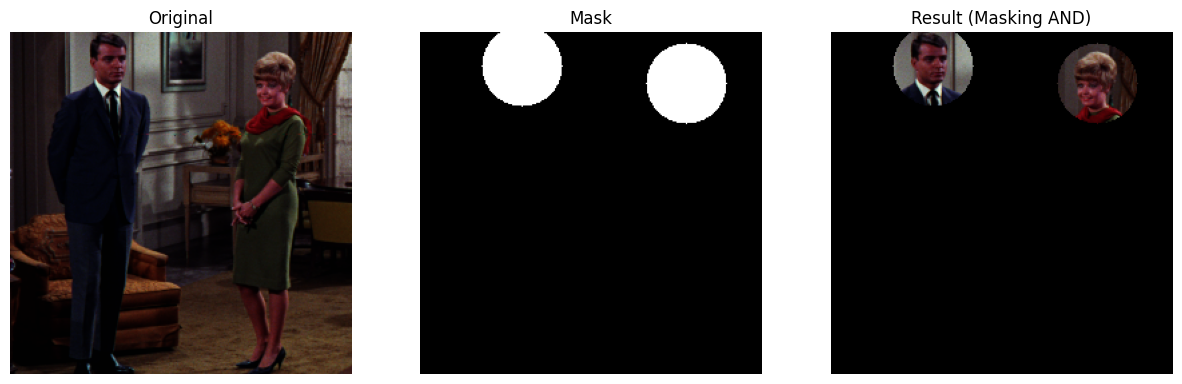

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra asli
img = cv.imread("/content/drive/MyDrive/PCVK/couple.tiff")

# Buat mask hitam dengan ukuran sama seperti citra
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Tambahkan 2 lingkaran putih (masking area)
h, w = mask.shape
cv.circle(mask, (int(w*0.30), int(h*0.1)), 30, 255, -1)   # lingkaran kiri
cv.circle(mask, (int(w*0.78), int(h*0.15)), 30, 255, -1)   # lingkaran kanan

# Operasi AND → hanya area putih mask yang muncul
result = cv.bitwise_and(img, img, mask=mask)

# ---- Tampilkan hasil ----
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title("Result (Masking AND)")
plt.axis("off")

plt.show()

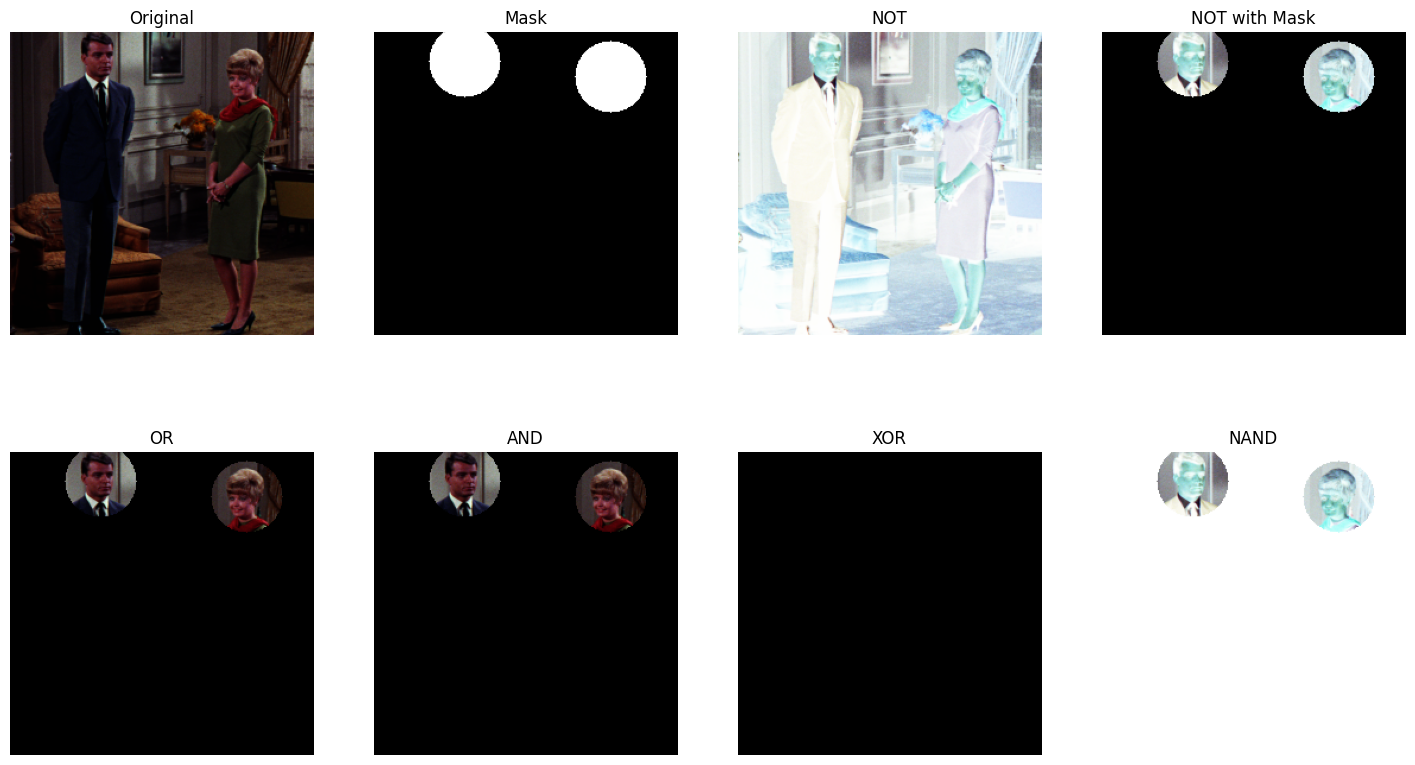

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca citra asli
img = cv.imread("/content/drive/MyDrive/PCVK/couple.tiff")

# 2. Buat mask hitam ukuran sama dengan citra
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# 3. Tambahkan lingkaran putih (area foreground yang ingin ditampilkan)
h, w = mask.shape
cv.circle(mask, (int(w*0.30), int(h*0.10)), 30, 255, -1)   # lingkaran kiri (pria)
cv.circle(mask, (int(w*0.78), int(h*0.15)), 30, 255, -1)   # lingkaran kanan (wanita)

# 4. Operasi logika (masking)
# NOT : membalik warna citra
not_result  = cv.bitwise_not(img)
not_with_mask_result = cv.bitwise_not(img, mask=mask)

# OR : menambahkan mask ke citra (bagian putih mask jadi terlihat)
or_result   = cv.bitwise_or(img, img, mask=mask)

# AND : menampilkan hanya bagian citra yang sesuai mask putih
and_result  = cv.bitwise_and(img, img, mask=mask)

# XOR : menampilkan bagian citra yang berbeda dengan mask
xor_result  = cv.bitwise_xor(img, img, mask=mask)

# NAND : kebalikan dari AND
nand_result = cv.bitwise_not(and_result)

# 5. Tampilkan hasil
titles = ["Original", "Mask", "NOT", "NOT with Mask", "OR", "AND", "XOR", "NAND"]
images = [img, mask, not_result, not_with_mask_result, or_result, and_result, xor_result, nand_result]

plt.figure(figsize=(18,10))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    if i == 1:   # khusus mask tampilkan grayscale
        plt.imshow(images[i], cmap="gray")
    else:
        plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")
plt.show()